In [85]:
## Preprcesamiento datos covid
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
from datetime import datetime
from seaborn import boxplot
from seaborn import distplot
sns.set()

In [86]:
df0 = pd.read_csv(r"C:\Users\Lenovo\Documents\2. Proyecto de grado\datos_covid.csv")
df1 =df0[['TIMESTAMP_UTC','PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']]
df1['TIMESTAMP_UTC'] = pd.to_datetime(df1['TIMESTAMP_UTC'])
df2 = df1.fillna(0)
df2

<ipython-input-86-dfc733754a86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TIMESTAMP_UTC'] = pd.to_datetime(df1['TIMESTAMP_UTC'])


,TIMESTAMP_UTC,PANIC_INDEX,MEDIA_HYPE_INDEX,FAKE_NEWS_INDEX,SENTIMENT_INDEX
0,2022-07-06,0.52,27.93,0.00,-7.87
1,2022-07-05,0.48,38.21,0.12,-4.97
2,2022-07-04,0.54,31.37,0.27,-5.85
3,2022-07-03,0.42,7.76,0.00,-3.67
4,2022-07-02,4.66,25.71,0.19,-3.56
...,...,...,...,...,...
913,2020-01-05,0.00,0.00,0.00,0.00
914,2020-01-04,0.00,0.00,0.00,-0.00
915,2020-01-03,0.00,0.00,0.00,-0.00
916,2020-01-02,0.00,0.00,0.00,-0.00


## Análisis exploratorio

In [87]:
df2.describe()

,PANIC_INDEX,MEDIA_HYPE_INDEX,FAKE_NEWS_INDEX,SENTIMENT_INDEX
count,918.000000,918.000000,918.000000,918.000000
mean,3.834401,36.964292,0.923115,-4.954336
std,6.461003,18.607859,2.861200,8.010973
min,0.000000,0.000000,0.000000,-32.820000
25%,0.830000,24.280000,0.100000,-9.907500
50%,1.790000,36.260000,0.350000,-3.765000
75%,4.100000,49.667500,0.750000,0.017500
max,73.530000,93.770000,46.490000,22.520000


<AxesSubplot:>

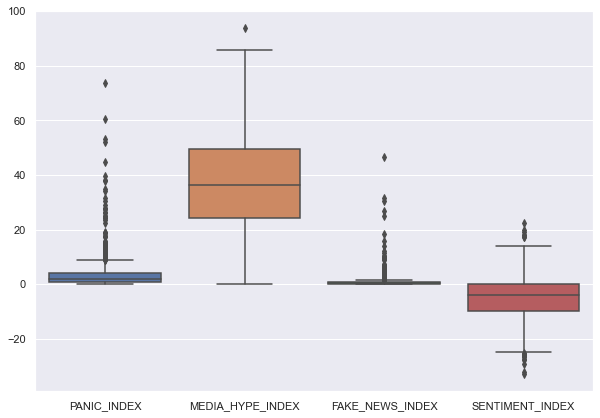

In [88]:
### Diagramas de caja y bigotes 
fig, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(data = df2[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']])

array([[<AxesSubplot:title={'center':'PANIC_INDEX'}>,
        <AxesSubplot:title={'center':'MEDIA_HYPE_INDEX'}>],
       [<AxesSubplot:title={'center':'FAKE_NEWS_INDEX'}>,
        <AxesSubplot:title={'center':'SENTIMENT_INDEX'}>]], dtype=object)

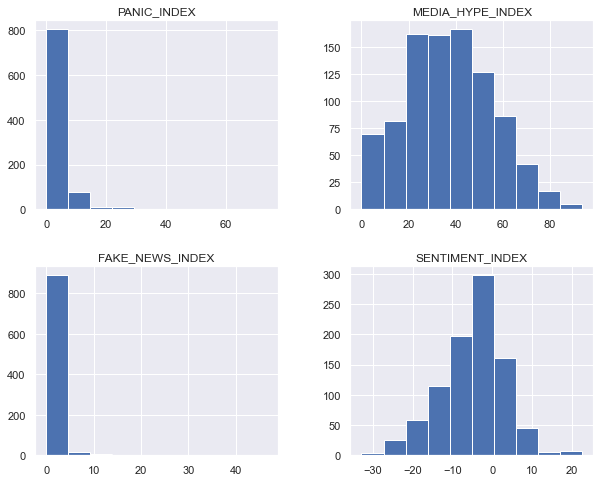

In [89]:
### Histograma 
df2[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']].hist(figsize=(10,8))

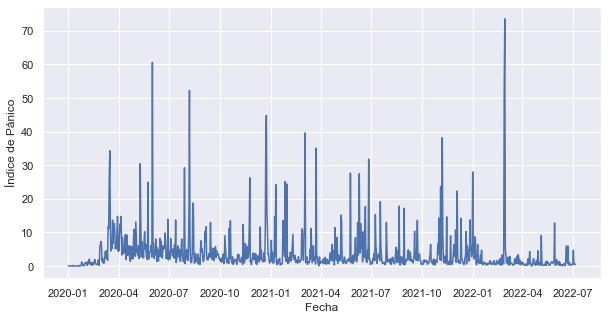

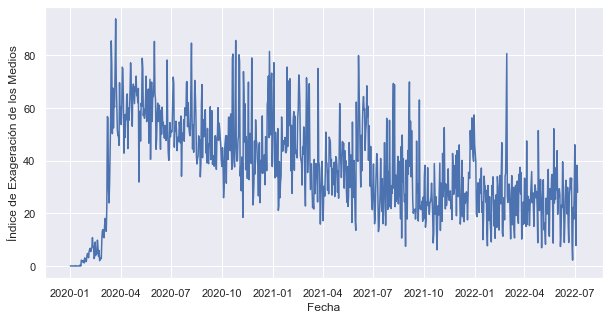

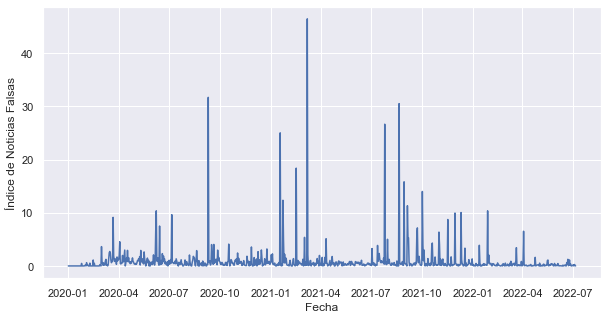

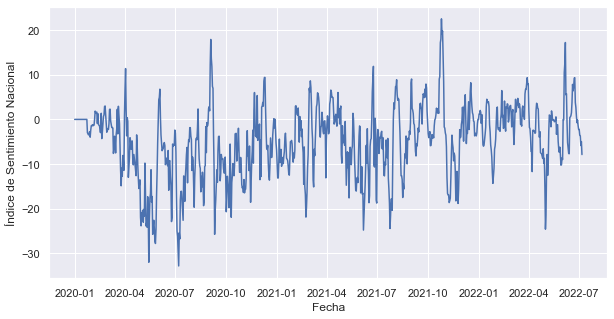

In [90]:
### Serie temporal
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "PANIC_INDEX", data = df2)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Pánico");
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "MEDIA_HYPE_INDEX", data = df2)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Exageración de los Medios");
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "FAKE_NEWS_INDEX", data = df2)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Noticias Falsas");
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "SENTIMENT_INDEX", data = df2)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Sentimiento Nacional");

## Normalización de datos 

In [91]:
### Normalización de datos 
df3 = (df2[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']]-df2[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']].min())/(df2[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']].max()-df2[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']].min())
df3.describe()
df4 = df2[['TIMESTAMP_UTC']]
dfa = pd.concat([df4, df3], axis=1)
dfa

,TIMESTAMP_UTC,PANIC_INDEX,MEDIA_HYPE_INDEX,FAKE_NEWS_INDEX,SENTIMENT_INDEX
0,2022-07-06,0.007072,0.297856,0.000000,0.450849
1,2022-07-05,0.006528,0.407486,0.002581,0.503253
2,2022-07-04,0.007344,0.334542,0.005808,0.487351
3,2022-07-03,0.005712,0.082756,0.000000,0.526744
4,2022-07-02,0.063375,0.274182,0.004087,0.528731
...,...,...,...,...,...
913,2020-01-05,0.000000,0.000000,0.000000,0.593061
914,2020-01-04,0.000000,0.000000,0.000000,0.593061
915,2020-01-03,0.000000,0.000000,0.000000,0.593061
916,2020-01-02,0.000000,0.000000,0.000000,0.593061


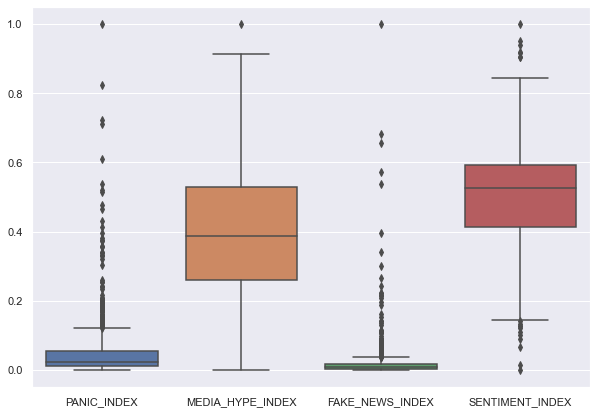

In [92]:
### Diagrama de caja y bigotes - Normalizados
fig, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(data = dfa[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']]);

array([[<AxesSubplot:title={'center':'PANIC_INDEX'}>,
        <AxesSubplot:title={'center':'MEDIA_HYPE_INDEX'}>],
       [<AxesSubplot:title={'center':'FAKE_NEWS_INDEX'}>,
        <AxesSubplot:title={'center':'SENTIMENT_INDEX'}>]], dtype=object)

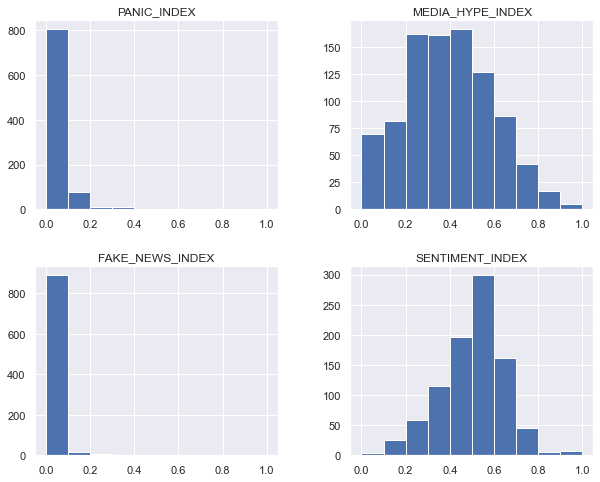

In [93]:
### Histograma - Normalizado
dfa[['PANIC_INDEX','MEDIA_HYPE_INDEX','FAKE_NEWS_INDEX','SENTIMENT_INDEX']].hist(figsize=(10,8))

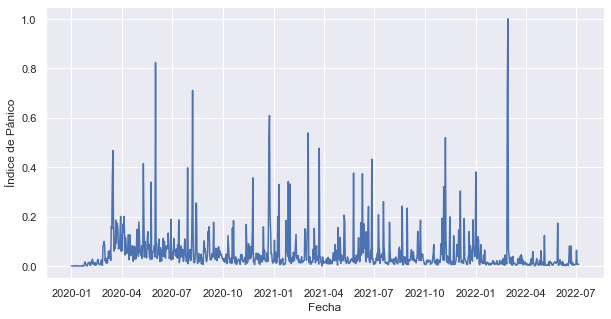

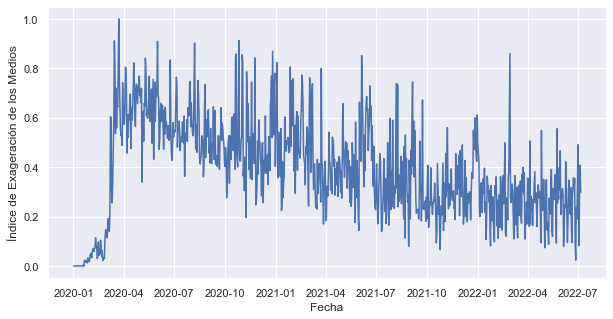

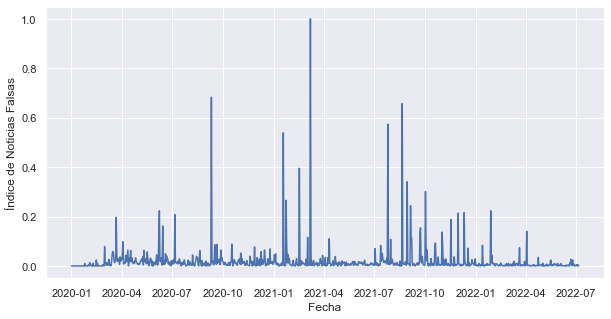

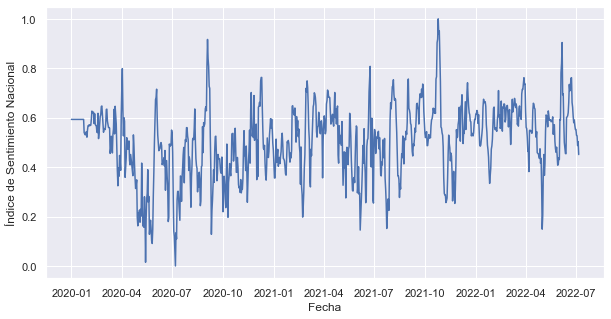

In [94]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "PANIC_INDEX", data = dfa)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Pánico");
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "MEDIA_HYPE_INDEX", data = dfa)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Exageración de los Medios");
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "FAKE_NEWS_INDEX", data = dfa)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Noticias Falsas");
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = "TIMESTAMP_UTC", y = "SENTIMENT_INDEX", data = dfa)
plt.xlabel("Fecha") 
plt.ylabel("Índice de Sentimiento Nacional");

In [98]:
echo "#Proyecto-de-grado" >> README.md 
git init 
git add README.md 
git commit -m "first commit" 
git branch -M main 
git remote add origen https://github.com/danielcorredor99/Proyecto- de-grado.git
 git push -u origen principal

SyntaxError: invalid syntax (<ipython-input-98-42f7de059d34>, line 1)